In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
x = np.linspace(-5,5,1000)
hb = 1
m = 1
w = 1



In [12]:
def Pot(x):
    return 0.5*m*(w**2)*(x**2)

def K(x, i, E):
    if i == 1000:
        return (0.5*m/hb**2)*(E - Pot(x[i-1] + 0.01001))
    return (0.5*m/hb**2)*(E - Pot(x[i]))

In [13]:
def Numerov(x, E):

    h = x[1] - x[0]
    psi = np.zeros(len(x))

    psi[1] = 10**(-5)

    

    for i in range(2, len(x)):
        psi1  = (psi[i-1]*(2 + (10/12)*h*x[i]**2*K(x,i,E)) - psi[i-2]*(1 - (1/12)*h*x[i]**2*K(x, i-1, E)))/(1 - (1/12)*h*x[i]*K(x, i+1, E))
        psi[i] = psi1

    return psi


In [26]:
def Numerov1(x, E):

    h = x[1] - x[0]
    psi = np.zeros(len(x))

    psi[1] = 10**(-5)

    

    for i in range(2, len(x)):
        psi1  = (-(1/12)*h**2*(12*(-2*m/hb**2)*E) + 2*(1+(5/12)*h**2*Pot(x[i-1])*(-2*m/hb**2))*psi[i-1] - (1 - (1/12)*Pot(x[i-2])*(-2*m/hb**2))*psi[i-1])/(1 - (1/12)*h**2*Pot(x[i]+0.01001)*(-2*m/hb**2))
        psi[i] = psi1

    return psi


In [33]:
psi1 = Numerov1(x, 2.5)
psi2 = Numerov(x,2.5)

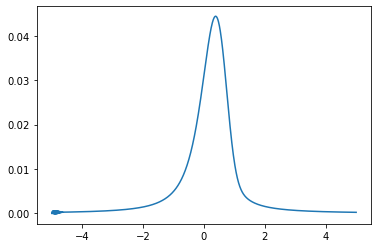

In [35]:
plt.plot(x,psi1)
#plt.plot(x,psi2)